In [38]:
import kagglehub
import os
import pandas as pd

path = kagglehub.dataset_download("mohinurabdurahimova/maildataset")

csv_files = [f for f in os.listdir(path) if f.endswith('.csv')]

if csv_files:
    csv_file_path = os.path.join(path, csv_files[0])
    print(f"Found CSV file: {csv_files[0]}")
    df = pd.read_csv(csv_file_path)
    print("First 5 rows of the DataFrame:")
    display(df.head())
else:
    print("No CSV files found in the downloaded dataset.")
print("Path to dataset files:", path)

Found CSV file: mail_data.csv
First 5 rows of the DataFrame:


,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


Path to dataset files: /kaggle/input/maildataset


## первое что нужно сделать - это преобразовать таргетную переменную в бинарную (ham -> 1, spam -> 0)

In [39]:
df['Category'].value_counts()

,count
Category,
ham,4825
spam,747


In [40]:
df['Category'] = df['Category'].map({'ham':1, 'spam':0}).astype(int)

In [41]:
df['Category'].value_counts()

,count
Category,
1,4825
0,747


In [42]:
df['Message'].isna().sum()

np.int64(0)

In [43]:
df.duplicated(subset=['Message']).sum()

np.int64(415)

## Удалим дубликаты, так как они могут сильно завышать веса некоторых слов, при которых модель сразу будет говорить, что тот или иной текст спам

In [44]:
df.drop_duplicates(subset=['Message'], inplace=True)

## Теперь посчитаем количественную статистику текста в нешем датасете

In [45]:
import re

# Длина сообщения в символах
df['len_message'] = df['Message'].astype(str).apply(len)

# Количество токенов (слов)
df['word_count'] = df['Message'].astype(str).apply(lambda x: len(x.split()))

# Доля уникальных токенов
'''
Общее количество слов (токенов) = 4 (Привет, привет, как, дела?)
Количество уникальных слов (токенов) = 3 (Привет, как, дела?)
Доля уникальных токенов = 3 / 4 = 0.75
'''
df['unique_word_ratio'] = df['Message'].astype(str).apply(lambda x: len(set(x.split())) / len(x.split()) if len(x.split()) > 0 else 0)

# Количество цифр
df['digit_count'] = df['Message'].astype(str).apply(lambda x: sum(c.isdigit() for c in x))

# Количество восклицательных знаков
df['exclamation_count'] = df['Message'].astype(str).apply(lambda x: x.count('!'))

# Доля слов в верхнем регистре
df['uppercase_ratio'] = df['Message'].astype(str).apply(lambda x: sum(word.isupper() for word in x.split()) / len(x.split()) if len(x.split()) > 0 else 0)

# Отображение первых строк с новыми столбцами
display(df.head())

,Category,Message,len_message,word_count,unique_word_ratio,digit_count,exclamation_count,uppercase_ratio
0,1,"Go until jurong point, crazy.. Available only ...",111,20,1.000000,0,0,0.000000
1,1,Ok lar... Joking wif u oni...,29,6,1.000000,0,0,0.000000
2,0,Free entry in 2 a wkly comp to win FA Cup fina...,155,28,0.857143,25,0,0.071429
3,1,U dun say so early hor... U c already then say...,49,11,0.909091,0,0,0.181818
4,1,"Nah I don't think he goes to usf, he lives aro...",61,13,0.923077,0,0,0.076923


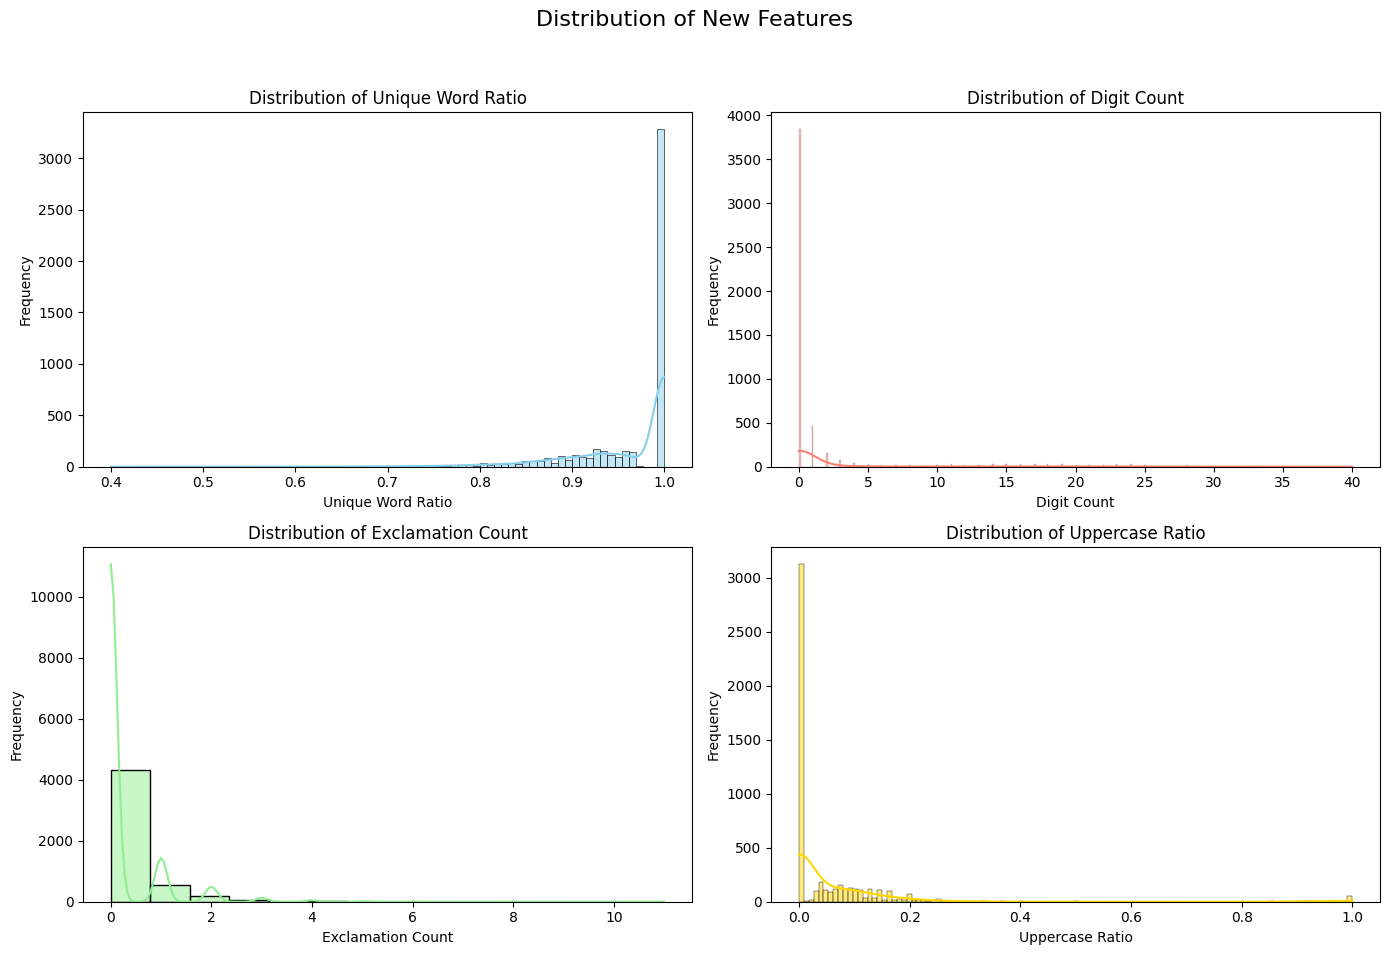

/tmp/ipython-input-3159030045.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(ax=axes[0], data=df, x='Category', y='len_message', palette='viridis')
/tmp/ipython-input-3159030045.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(ax=axes[1], data=df, x='Category', y='word_count', palette='plasma')


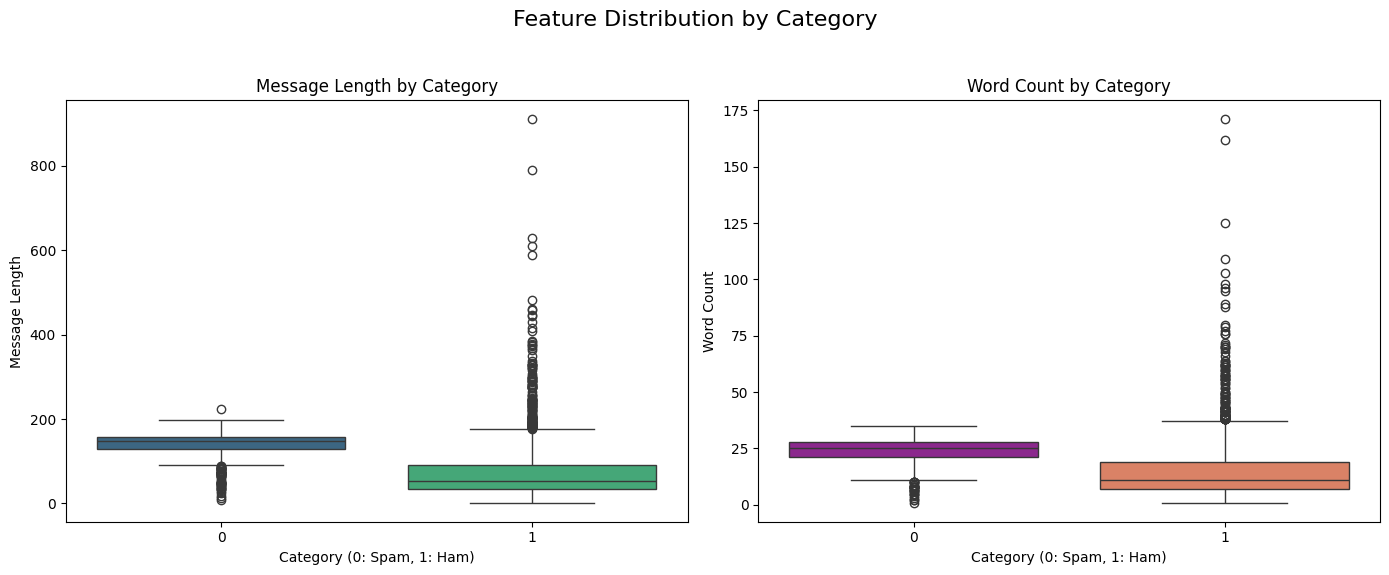

/tmp/ipython-input-3159030045.py:52: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Category', y='exclamation_count', palette='coolwarm')


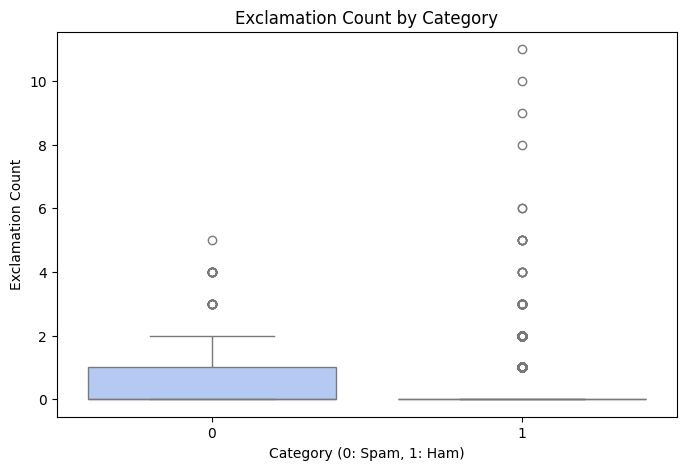

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn-v0_8-pastel')


fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Distribution of New Features', fontsize=16)

sns.histplot(ax=axes[0, 0], data=df, x='unique_word_ratio', kde=True, color='skyblue')
axes[0, 0].set_title('Distribution of Unique Word Ratio')
axes[0, 0].set_xlabel('Unique Word Ratio')
axes[0, 0].set_ylabel('Frequency')

sns.histplot(ax=axes[0, 1], data=df, x='digit_count', kde=True, color='salmon')
axes[0, 1].set_title('Distribution of Digit Count')
axes[0, 1].set_xlabel('Digit Count')
axes[0, 1].set_ylabel('Frequency')

sns.histplot(ax=axes[1, 0], data=df, x='exclamation_count', kde=True, color='lightgreen')
axes[1, 0].set_title('Distribution of Exclamation Count')
axes[1, 0].set_xlabel('Exclamation Count')
axes[1, 0].set_ylabel('Frequency')

sns.histplot(ax=axes[1, 1], data=df, x='uppercase_ratio', kde=True, color='gold')
axes[1, 1].set_title('Distribution of Uppercase Ratio')
axes[1, 1].set_xlabel('Uppercase Ratio')
axes[1, 1].set_ylabel('Frequency')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


fig, axes = plt.subplots(1, 2, figsize=(14, 6))
fig.suptitle('Feature Distribution by Category', fontsize=16)

sns.boxplot(ax=axes[0], data=df, x='Category', y='len_message', palette='viridis')
axes[0].set_title('Message Length by Category')
axes[0].set_xlabel('Category (0: Spam, 1: Ham)')
axes[0].set_ylabel('Message Length')

sns.boxplot(ax=axes[1], data=df, x='Category', y='word_count', palette='plasma')
axes[1].set_title('Word Count by Category')
axes[1].set_xlabel('Category (0: Spam, 1: Ham)')
axes[1].set_ylabel('Word Count')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='Category', y='exclamation_count', palette='coolwarm')
plt.title('Exclamation Count by Category')
plt.xlabel('Category (0: Spam, 1: Ham)')
plt.ylabel('Exclamation Count')
plt.show()

## Наблюдения, которые мы получили из графиков
- в сообщениях спама больше текста в целом, однако в обычных сообщениях куда больше выбросов в бОльшую сторону - это говорит о том, что пользователи обычно пишут маленькие сообщения, но иногда гораздо больше тех, что в спаме.
- пользователи в обычных сообщениях почти не ставят восклицательные знаки, а если ставят то много, в спаме же ставят чаще в среднем и их количество = +- 1
- распределение цифр и больших букв не очень велико

In [47]:
category_stats = df.groupby('Category')[['exclamation_count', 'digit_count', 'uppercase_ratio']].mean()

print("Средняя статистика по категориям:")
display(category_stats)

Средняя статистика по категориям:


,exclamation_count,digit_count,uppercase_ratio
Category,,,
0,0.692668,15.329173,0.107994
1,0.177591,0.296723,0.053801


# Информация из статистик:
- Число цифр, восклицательных знаков, больших букв бОльше в спам сообщениях - это наверное одни из важнейших критериев при классификации


/tmp/ipython-input-134016999.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(top_20_spam.keys()), y=list(top_20_spam.values()), palette='viridis')


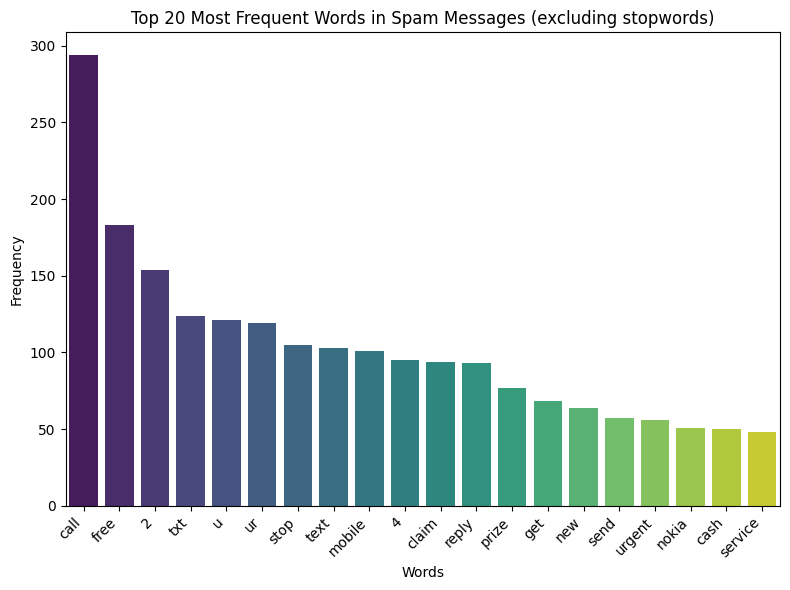

/tmp/ipython-input-134016999.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(top_20_ham.keys()), y=list(top_20_ham.values()), palette='plasma')


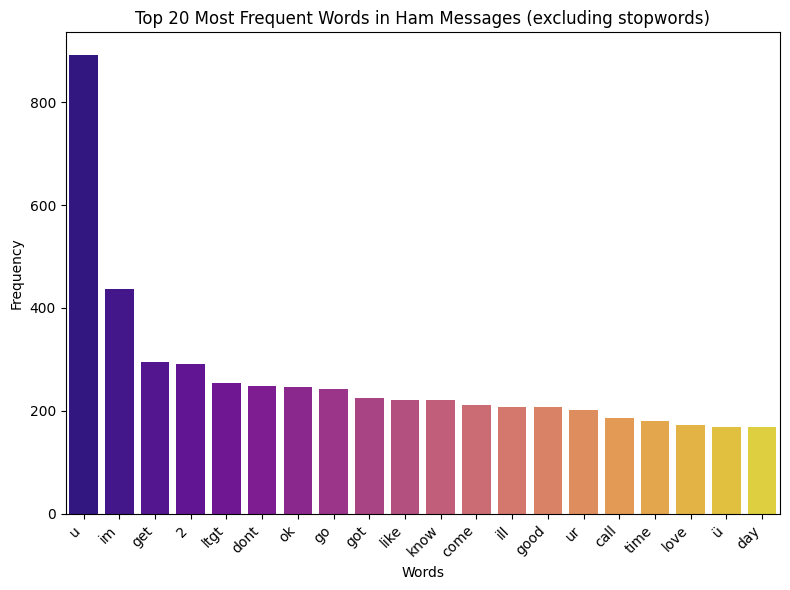

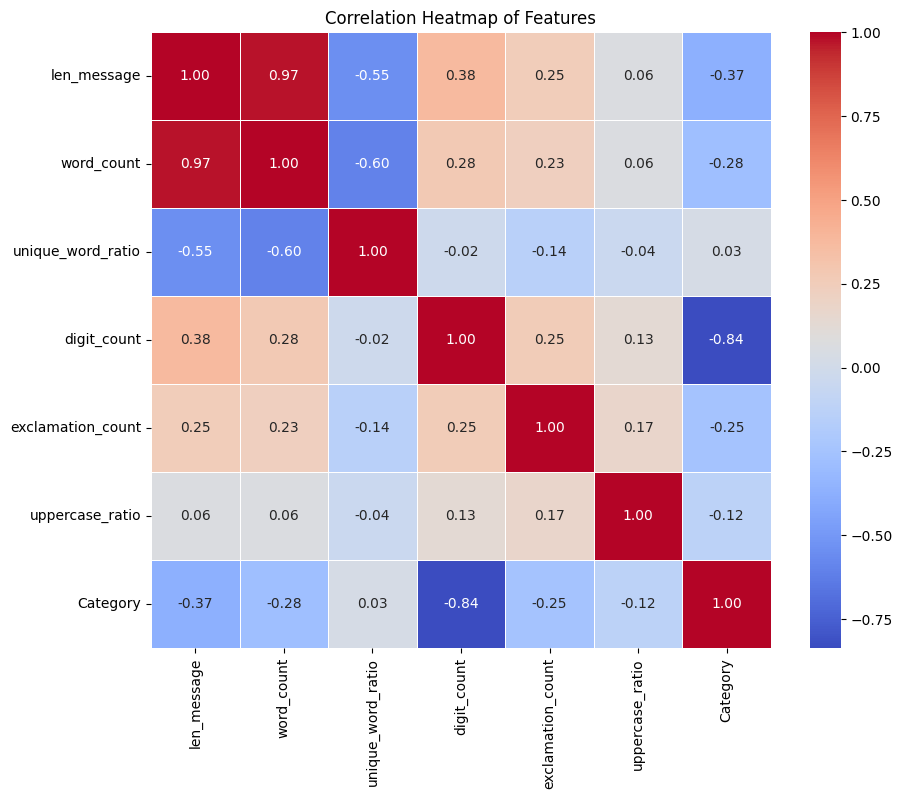

In [48]:
from collections import Counter
import nltk
from nltk.corpus import stopwords
import string

nltk.download('stopwords', quiet=True)

# Функция для получения топ n слов
def get_top_n_words(corpus, n=None):
    words = []
    for text in corpus:
        text = text.translate(str.maketrans('', '', string.punctuation)).lower()
        words.extend(text.split())

    stopwords_set = set(stopwords.words('english'))
    words = [word for word in words if word not in stopwords_set]

    word_counts = Counter(words)

    top_words = word_counts.most_common(n)
    return dict(top_words)

# Получаем топ 20 слов из ham и spam
top_20_spam = get_top_n_words(df[df['Category'] == 0]['Message'], 20)
top_20_ham = get_top_n_words(df[df['Category'] == 1]['Message'], 20)


plt.figure(figsize=(8, 6))
sns.barplot(x=list(top_20_spam.keys()), y=list(top_20_spam.values()), palette='viridis')
plt.title('Top 20 Most Frequent Words in Spam Messages (excluding stopwords)')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 6))
sns.barplot(x=list(top_20_ham.keys()), y=list(top_20_ham.values()), palette='plasma')
plt.title('Top 20 Most Frequent Words in Ham Messages (excluding stopwords)')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


correlation_matrix = df[['len_message', 'word_count', 'unique_word_ratio', 'digit_count', 'exclamation_count', 'uppercase_ratio', 'Category']].corr()


plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap of Features')
plt.show()

In [49]:
df.head()

,Category,Message,len_message,word_count,unique_word_ratio,digit_count,exclamation_count,uppercase_ratio
0,1,"Go until jurong point, crazy.. Available only ...",111,20,1.000000,0,0,0.000000
1,1,Ok lar... Joking wif u oni...,29,6,1.000000,0,0,0.000000
2,0,Free entry in 2 a wkly comp to win FA Cup fina...,155,28,0.857143,25,0,0.071429
3,1,U dun say so early hor... U c already then say...,49,11,0.909091,0,0,0.181818
4,1,"Nah I don't think he goes to usf, he lives aro...",61,13,0.923077,0,0,0.076923


In [50]:
import re, html

# Компактные предкомпилированные паттерны
_RE_HTML   = re.compile(r'<[^>]+>')
_RE_URL    = re.compile(r'(https?://\S+|www\.\S+)', flags=re.IGNORECASE)
_RE_EMAIL  = re.compile(r'\b[\w\.-]+@[\w\.-]+\.\w{2,}\b', flags=re.IGNORECASE)
_RE_NUMBER = re.compile(r'(\+?\d[\d\-\.\, ]{1,}\d)')
# Удаляем пунктуацию, но не ломаем плейсхолдеры <URL>, <EMAIL>, <NUMBER> и апострофы
_RE_PUNCT  = re.compile(r'(?!(<URL>|<EMAIL>|<NUMBER>))[^A-Za-z0-9<>\' ]+')

def preprocess_text(text: str) -> str:
    """
    Минималистичная предобработка текста:
    - lowercase, HTML-unescape
    - замена URL/email/чисел на <URL>/<EMAIL>/<NUMBER>
    - удаление HTML-тегов и лишней пунктуации
    - сокращение длинных повторов букв (loooove -> loove)
    - нормализация пробелов
    Возвращает очищенную строку.
    """
    if text is None:
        return ''
    s = html.unescape(str(text)).lower()
    s = _RE_HTML.sub(' ', s)
    s = _RE_URL.sub(' <URL> ', s)
    s = _RE_EMAIL.sub(' <EMAIL> ', s)
    s = _RE_NUMBER.sub(' <NUMBER> ', s)
    s = _RE_PUNCT.sub(' ', s)
    # нормализуем удлинения букв: 3+ -> 2 (loooove -> loove)
    s = re.sub(r'([a-zа-яё])\1{2,}', r'\1\1', s)
    s = re.sub(r'\s+', ' ', s).strip()
    return s
df['cleaned_message'] = df['Message'].apply(preprocess_text)

df['tokens'] = df['cleaned_message'].apply(lambda x: x.split())

display(df[['Message', 'cleaned_message', 'tokens']].head())


,Message,cleaned_message,tokens
0,"Go until jurong point, crazy.. Available only ...",go until jurong point crazy available only in ...,"[go, until, jurong, point, crazy, available, o..."
1,Ok lar... Joking wif u oni...,ok lar joking wif u oni,"[ok, lar, joking, wif, u, oni]"
2,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in 2 a wkly comp to win fa cup fina...,"[free, entry, in, 2, a, wkly, comp, to, win, f..."
3,U dun say so early hor... U c already then say...,u dun say so early hor u c already then say,"[u, dun, say, so, early, hor, u, c, already, t..."
4,"Nah I don't think he goes to usf, he lives aro...",nah i don't think he goes to usf he lives arou...,"[nah, i, don't, think, he, goes, to, usf, he, ..."


In [51]:
df.head()

,Category,Message,len_message,word_count,unique_word_ratio,digit_count,exclamation_count,uppercase_ratio,cleaned_message,tokens
0,1,"Go until jurong point, crazy.. Available only ...",111,20,1.000000,0,0,0.000000,go until jurong point crazy available only in ...,"[go, until, jurong, point, crazy, available, o..."
1,1,Ok lar... Joking wif u oni...,29,6,1.000000,0,0,0.000000,ok lar joking wif u oni,"[ok, lar, joking, wif, u, oni]"
2,0,Free entry in 2 a wkly comp to win FA Cup fina...,155,28,0.857143,25,0,0.071429,free entry in 2 a wkly comp to win fa cup fina...,"[free, entry, in, 2, a, wkly, comp, to, win, f..."
3,1,U dun say so early hor... U c already then say...,49,11,0.909091,0,0,0.181818,u dun say so early hor u c already then say,"[u, dun, say, so, early, hor, u, c, already, t..."
4,1,"Nah I don't think he goes to usf, he lives aro...",61,13,0.923077,0,0,0.076923,nah i don't think he goes to usf he lives arou...,"[nah, i, don't, think, he, goes, to, usf, he, ..."


# **Построение модели**


In [52]:
import numpy as np
from collections import defaultdict

class SpamAnalizer:
    def __init__(self, smoothing=1):
        self.smoothing = smoothing
        self.prior_probabilities = {}#априорные вероятнотси классов
        self.word_likelihoods = {}#мапа вероятности слова в зависимотси от класса
        self.vocab = set()#словарь всех слов исп. в обучении
        self.total_spam_words = 0 # Добавляем хранение общего количества спам слов
        self.total_ham_words = 0 # Добавляем хранение общего количества не спам слов
        self.vocab_size = 0 # Добавляем хранение размера словаря


    def train(self, messages, categories):
        """
        Trains the Naive Bayes classifier.

        Args:
            messages (pd.Series): Series of preprocessed message strings.
            categories (pd.Series): Series of corresponding categories (0 for spam, 1 for ham).
        """
        total_messages = len(messages)
        spam_messages = messages[categories == 0]
        ham_messages = messages[categories == 1]

        # Подсчёт априорной вероятности
        self.prior_probabilities[0] = len(spam_messages) / total_messages
        self.prior_probabilities[1] = len(ham_messages) / total_messages

        # Подсчёт количества слов спама и не спама
        spam_word_counts = defaultdict(int)
        ham_word_counts = defaultdict(int)

        for message in spam_messages:
            for word in message.split():
                spam_word_counts[word] += 1
                self.vocab.add(word)

        for message in ham_messages:
            for word in message.split():
                ham_word_counts[word] += 1
                self.vocab.add(word)


        self.total_spam_words = sum(spam_word_counts.values()) # Сохраняем общее количество спам слов
        self.total_ham_words = sum(ham_word_counts.values()) # Сохраняем общее количество не спам слов
        self.vocab_size = len(self.vocab) # Сохраняем размер словаря

        self.word_likelihoods[0] = {}
        self.word_likelihoods[1] = {}

        for word in self.vocab:
            self.word_likelihoods[0][word] = (spam_word_counts[word] + self.smoothing) / (self.total_spam_words + self.vocab_size * self.smoothing)
            self.word_likelihoods[1][word] = (ham_word_counts[word] + self.smoothing) / (self.total_ham_words + self.vocab_size * self.smoothing)

    def predict(self, message):
        """
        Predicts the category of a given message.

        Args:
            message (str): The input message string.

        Returns:
            int: Predicted category (0 for spam, 1 for ham).
        """

        preprocessed_message = preprocess_text(message)
        tokens = preprocessed_message.split()
        log_prob_spam = np.log(self.prior_probabilities[0])
        log_prob_ham = np.log(self.prior_probabilities[1])

        for token in tokens:
            if token in self.vocab:
                log_prob_spam += np.log(self.word_likelihoods[0].get(token))
                log_prob_ham += np.log(self.word_likelihoods[1].get(token))
            else:
                log_prob_spam += np.log(self.smoothing / (self.total_spam_words + self.vocab_size * self.smoothing))
                log_prob_ham += np.log(self.smoothing / (self.total_ham_words + self.vocab_size * self.smoothing))

        return 0 if log_prob_spam > log_prob_ham else 1

## Разделение данных


In [53]:
from sklearn.model_selection import train_test_split

X = df['cleaned_message']
y = df['Category']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (4125,)
Shape of X_test: (1032,)
Shape of y_train: (4125,)
Shape of y_test: (1032,)


## Тренировка модели

In [54]:
spam_analyzer = SpamAnalizer()
spam_analyzer.train(X_train, y_train)

## Оценка модели


In [55]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

y_pred = [spam_analyzer.predict(message) for message in X_test]

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

Accuracy: 0.9729
Precision: 0.9954
Recall: 0.9732
F1-score: 0.9842


## Попробуем найти лучшие параметры модели

In [56]:
smoothing_values = [0.1, 0.5, 1.0, 5.0, 10.0]
results = []

for smoothing in smoothing_values:
    print(f"Experimenting with smoothing = {smoothing}")
    spam_analyzer = SpamAnalizer(smoothing=smoothing)
    spam_analyzer.train(X_train, y_train)

    y_pred = [spam_analyzer.predict(message) for message in X_test]

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    results.append({
        'smoothing': smoothing,
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1_score': f1
    })
    print(f"  Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1-score: {f1:.4f}")

print("\n--- Results Summary ---")
for result in results:
    print(f"Smoothing: {result['smoothing']:.1f}, Accuracy: {result['accuracy']:.4f}, Precision: {result['precision']:.4f}, Recall: {result['recall']:.4f}, F1-score: {result['f1_score']:.4f}")

Experimenting with smoothing = 0.1
  Accuracy: 0.9738, Precision: 0.9954, Recall: 0.9743, F1-score: 0.9848
Experimenting with smoothing = 0.5
  Accuracy: 0.9709, Precision: 0.9954, Recall: 0.9710, F1-score: 0.9831
Experimenting with smoothing = 1.0
  Accuracy: 0.9729, Precision: 0.9954, Recall: 0.9732, F1-score: 0.9842
Experimenting with smoothing = 5.0
  Accuracy: 0.9680, Precision: 0.9716, Recall: 0.9922, F1-score: 0.9818
Experimenting with smoothing = 10.0
  Accuracy: 0.9477, Precision: 0.9460, Recall: 0.9967, F1-score: 0.9707

--- Results Summary ---
Smoothing: 0.1, Accuracy: 0.9738, Precision: 0.9954, Recall: 0.9743, F1-score: 0.9848
Smoothing: 0.5, Accuracy: 0.9709, Precision: 0.9954, Recall: 0.9710, F1-score: 0.9831
Smoothing: 1.0, Accuracy: 0.9729, Precision: 0.9954, Recall: 0.9732, F1-score: 0.9842
Smoothing: 5.0, Accuracy: 0.9680, Precision: 0.9716, Recall: 0.9922, F1-score: 0.9818
Smoothing: 10.0, Accuracy: 0.9477, Precision: 0.9460, Recall: 0.9967, F1-score: 0.9707


## Конструирование признаков (tf-idf и N-граммы)



In [57]:
from sklearn.feature_extraction.text import TfidfVectorizer

ngram_ranges = [(1, 1), (1, 2)]
tfidf_data = {}

for ngram_range in ngram_ranges:
    print(f"Applying TF-IDF with ngram_range = {ngram_range}")
    tfidf_vectorizer = TfidfVectorizer(ngram_range=ngram_range)

    X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)

    X_test_tfidf = tfidf_vectorizer.transform(X_test)

    tfidf_data[ngram_range] = {
        'X_train': X_train_tfidf,
        'X_test': X_test_tfidf,
        'vectorizer': tfidf_vectorizer
    }

    print(f"  Shape of X_train_tfidf for {ngram_range}: {X_train_tfidf.shape}")
    print(f"  Shape of X_test_tfidf for {ngram_range}: {X_test_tfidf.shape}")

print("\nTF-IDF vectorization complete for all specified n-gram ranges.")

Applying TF-IDF with ngram_range = (1, 1)
  Shape of X_train_tfidf for (1, 1): (4125, 6988)
  Shape of X_test_tfidf for (1, 1): (1032, 6988)
Applying TF-IDF with ngram_range = (1, 2)
  Shape of X_train_tfidf for (1, 2): (4125, 40850)
  Shape of X_test_tfidf for (1, 2): (1032, 40850)

TF-IDF vectorization complete for all specified n-gram ranges.


In [58]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

for ngram_range, data in tfidf_data.items():
    print(f"\nTraining and evaluating with ngram_range = {ngram_range}")

    X_train_tfidf = data['X_train']
    X_test_tfidf = data['X_test']

    nb_model = MultinomialNB()

    nb_model.fit(X_train_tfidf, y_train)

    y_pred_tfidf = nb_model.predict(X_test_tfidf)

    accuracy = accuracy_score(y_test, y_pred_tfidf)
    precision = precision_score(y_test, y_pred_tfidf)
    recall = recall_score(y_test, y_pred_tfidf)
    f1 = f1_score(y_test, y_pred_tfidf)

    print(f"  Accuracy: {accuracy:.4f}")
    print(f"  Precision: {precision:.4f}")
    print(f"  Recall: {recall:.4f}")
    print(f"  F1-score: {f1:.4f}")


Training and evaluating with ngram_range = (1, 1)
  Accuracy: 0.9651
  Precision: 0.9614
  Recall: 1.0000
  F1-score: 0.9803

Training and evaluating with ngram_range = (1, 2)
  Accuracy: 0.9583
  Precision: 0.9542
  Recall: 1.0000
  F1-score: 0.9766
